In [8]:
# 데이터 가져오기
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [9]:
# 모델에 입력할 x값 생성
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [10]:
# 모델에 예측할 y값 준비
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [11]:
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요. (sklearn 활용)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [12]:
#입력 데이터 개수에 맞는 가중치 W와 b를 준비해

W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [13]:
# 모델 함수 정의
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [14]:
# 손실 함수 정의 (mse)
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [15]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [16]:
# 기울기 계산하는 gradient함수 정의
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [44]:
# 하이퍼 파라미터 설정
LEARNING_RATE = 0.1

In [45]:
# 정의된 손실함수와 gradient함수로 모델 학습

global W, b

losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10000 : Loss 2868.5499
Iteration 20000 : Loss 2868.5499
Iteration 30000 : Loss 2868.5499
Iteration 40000 : Loss 2868.5499
Iteration 50000 : Loss 2868.5498
Iteration 60000 : Loss 2868.5498
Iteration 70000 : Loss 2868.5498
Iteration 80000 : Loss 2868.5498
Iteration 90000 : Loss 2868.5498
Iteration 100000 : Loss 2868.5498


In [36]:
# test 데이터에 대한 성능을 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2889.9788028092794)

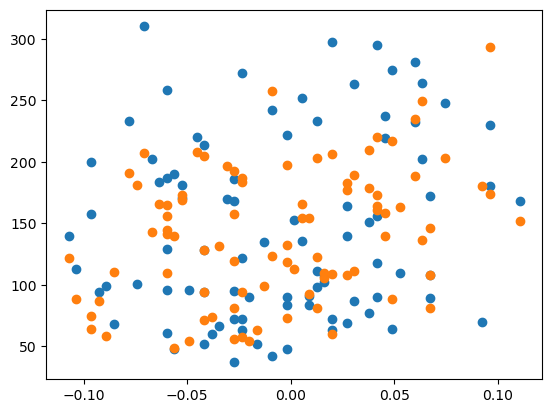

In [37]:
# 시각화
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()